In [21]:
from MSSD import MSSD
import math
import numpy as np
from alive_progress import alive_bar
import matplotlib.pyplot as plt
%matplotlib inline


In [36]:
def sphere_point(theta, phi):
    return [math.sin(phi)*math.cos(theta), math.sin(phi)*math.sin(theta), -math.cos(phi)]

def great_circle_with_time(theta, length=10, noise=False, sigma=0.05, time_i=0, time_f=10):
    traj = np.zeros((time_f-time_i,4))
    for i in range(0, time_f-time_i):
        traj[i][1:] = sphere_point(theta, (time_i+i)*math.pi/length)
        traj[i][0] = sphere_point(theta, (time_i+i)*math.pi/length)[2]
        if noise == True:
            traj[i][1:] = np.add(traj[i],sigma*np.random.randn(1,3))
    return traj

l = 3000
traj1 = great_circle_with_time(2*math.pi*0.1, length=l, time_i=0, time_f=l)
traj2 = great_circle_with_time(2*math.pi*0.6, length=l, time_i=0, time_f=l)

In [37]:
dist_mat = np.zeros((len(traj1), len(traj2)))
eps = 1.976

with alive_bar(len(traj1)*len(traj2), force_tty=True) as bar:
    for i in range(len(traj1)):
        for j in range(len(traj2)):
            dist_mat[i,j] = round(np.linalg.norm(traj1[i][1:]-traj2[j][1:]), 3)
            bar()

print(dist_mat)
print((dist_mat < eps)*np.ones((len(traj1), len(traj2))))
#plt.matshow((dist_mat < eps))

|████████████████████████████████████▊   | ▅▃▁ 8267447/9000000 [92%] in 9:23 (14686.5/s, et00000 [0%] in 0s (17946.1/s, eta: 8:233421/9000000 [0%] in 2s (14497.1/s, eta: 10in 3s (14953.1/s, eta: 10 in 4s (14941.1/s, eta: 10 ▃▁▃ 106857/9000000 [1%] in 7s (15385.1/s, eta: 9135965/9000000 [2%] in 9s (15001.2/s, eta: 9in 15s (15053.5/s, eta: ▅▃▁ 241009/9000000 [3%] in 16s (15059.0/s, eta: 329202/9000000 [4%] in 22s (15055.4/s, eta:  ▆█▆ 399787/9000000 [4%] in 26s (15121.6/s, eta:  460089/9000000 [5%] in 30s (15122.4/s, eta:  ▃▁▃ 507787/9000000 [6%] in 33s (15164.2/s, eta:  524611/9000000 [6%] in 35s (15166.8/s, eta:  581096/9000000 [6%] in 39s (15085.2/s, eta: 605255/9000000 [7%] in 40s (15057.6/s, eta: (15185.0/s, eta:  870891/9000000 [10%] in 57s (15204.6/s, eta:▇▅▃ 919249/9000000 [10%] in 1:00 (15208.9/s, eta in 1:06 (15057.2/s, et ▇▅▃ 1005300/9000000 [11%] in 1:07 (15045.3/s, etin 1:08 (15014.5/s, etin 1:11 (14980.5/s, et ▃▅▇ 1064073/9000000 [12%] in 1:11 (14968.5/s, et (14958.1/s, et 

|████████████████████████████████████████| 9000000/9000000 [100%] in 10:12.5 (14694.77/s)   8322010/9000000 [92%] in 9:27 (14684.3/s, et8443527/9000000 [94%] in 9:34 (14698.4/s, et8446999/9000000 [94%] in 9:35 (14697.4/s, et █▆▄ 8457077/9000000 [94%] in 9:35 (14697.5/s, et 8521238/9000000 [95%] in 9:40 (14701.8/s, et8543541/9000000 [95%] in 9:41 (14708.9/s, et 8574387/9000000 [95%] in 9:43 (14712.6/s, et(14709.9/s, etin 9:46 (14705.8/s, et ▇▅▃ 8634256/9000000 [96%] in 9:47 (14701.2/s, etin 9:49 (14690.4/s, et (14690.4/s, et8739588/9000000 [97%] in 9:55 (14697.8/s, et 8746105/9000000 [97%] in 9:55 (14698.3/s, et8832548/9000000 [98%] in 10:01 (14701.0/s, e ▆█▆ 8839093/9000000 [98%] in 10:01 (14697.8/s, e ▆▄▂ 8857893/9000000 [98%] in 10:03 (14691.8/s, e ▄▆█ 8902158/9000000 [99%] in 10:06 (14696.8/s, ein 10:06 (14699.8/s, e8940924/9000000 [99%] in 10:08 (14698.7/s, e ▄▂▂ 8985363/9000000 [100%] in 10:11 (14698.4/s, 8989186/9000000 [100%] in 10:12 (14697.3/s, 
[[0.e+00 1.e-03 2.e-03 ... 2.e+

In [38]:
mssd = MSSD()
mssd.set_trajectories(traj1, traj2)

mssd.compute_filt()
mssd.t_thresh_metric(7)

#Detailed time profiler results:
#length - sorting time - main iteration time - post processing time
#300 - 0.01 - 1.13 - 0.05
#600 - 0.04 - 3.85 - 0.24
#2000 - 0.61 - 43.39 - 2.95
#Also seems to indicate quadratic time complexity
 

Sorting time:
1.7617791889999808
Iteration time:
112.28809582500003
Post processing time:
7.125329643000214


0.013

[0.765 1.045 1.299 1.521 1.705 1.848 1.945 1.994]


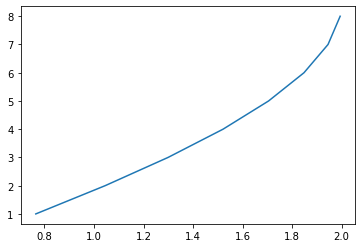

In [5]:
print(mssd.filt)

x = [i+1 for i in range(mssd.filt.shape[0])]
y = [mssd.filt[i] for i in range(mssd.filt.shape[0])]

plt.plot(y,x)
plt.show()